# **Data exploration**

## Objectives

* Examine the raw data from the Kaggle dataset to determine what cleaning/transformation is needed and reveal the most-obvious patterns

## Inputs

* `BankChurners.csv`

## Outputs

* Tables and charts (not for submission) 


---

# Change working directory

* Most of the code in this notebook should run in the project root directory

In [3]:
import os
current_dir = os.getcwd()
project_directory, notebooks_subdirectory = os.path.split(current_dir)
if notebooks_subdirectory == "jupyter_notebooks":
    os.chdir(project_directory)
    print(f"Changed working directory to project root: {project_directory}")
# Confirm the new current directory
os.getcwd()


'c:\\Users\\dave4\\vscode-projects\\Credit-Card-Customers'

# Install packages needed for processing

In [8]:
import pandas as pd
import numpy as np

# Load the source data

We have a local copy of the single table in the source dataset. Load that into a frame

In [5]:
source = pd.read_csv("data/BankChurners.csv")
source.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


---

### Drop the "Naive Bayes" columns as they are undocumented and clutter the display

In [6]:
naive_bayes_columns = [col for col in source.columns if "naive" in col.lower()]
source = source.drop(columns=naive_bayes_columns)
source.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### We want to generate some plots with minimal pre-processing, so lets pick those columns that are already numeric or have an obvious ordering

#### Summarise the categorical values and their frequencies

In [7]:
categorical_columns = [
    "Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category",
]
for col in categorical_columns:
    print(f"Column: {col}")
    print(source[col].value_counts())
    print()

Column: Attrition_Flag
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Column: Gender
Gender
F    5358
M    4769
Name: count, dtype: int64

Column: Education_Level
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Column: Marital_Status
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Column: Income_Category
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64



Although we have not fully explored the data set, there are some (incomplete) transforms we can do to make graphing easier

In [9]:
transformed = source.copy()
# Customer ID is not useful for plots
# Card Category likely has a monotonic ordering but we don't know it yet
transformed = transformed.drop(columns=["CLIENTNUM", "Card_Category"])

attrition_values = {
    'Existing Customer': 1,
    'Attrited Customer': 0,
}

gender_values = {
    'M': 1,
    'F': 0,
}

education_values = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': np.nan,
}

marital_status_values = {
    'Single': 0,
    'Married': 1,
    'Divorced': 0,
    'Widowed': 0,
    'Unknown': np.nan,
}

income_category_values = {
    'Less than $40K': 0,
    '$40K - $60K': 40,
    '$60K - $80K': 60,
    '$80K - $100K': 80,
    'More than $100K': 100,
    'Unknown': np.nan,
}

transformed['Attrition_Flag'] = transformed['Attrition_Flag'].map(attrition_values)
transformed['Gender'] = transformed['Gender'].map(gender_values)
transformed['Education_Level'] = transformed['Education_Level'].map(education_values)
transformed['Marital_Status'] = transformed['Marital_Status'].map(marital_status_values)
transformed['Income_Category'] = transformed['Income_Category'].map(income_category_values)
transformed.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,1.0,1.0,60.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,3.0,0.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,3.0,1.0,NaN,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,1.0,NaN,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,0.0,1.0,60.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Now we have a purely numeric view of (most of) the data, we can plot pair-wise to look for visible patterns

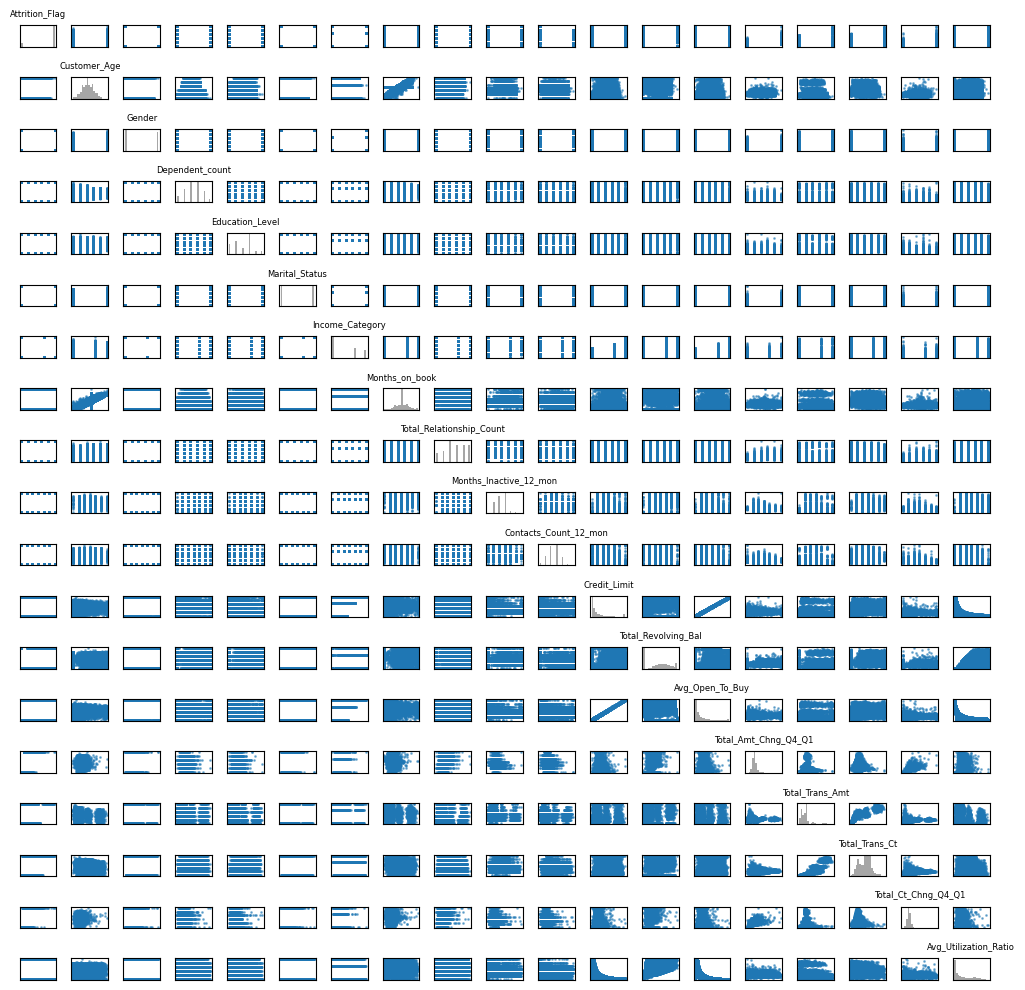

In [10]:
# Now we have a purely numeric view of (most of) the data, we can plot pair-wise to look for visible patterns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=19, ncols=19, figsize=(10, 10))
for i, col1 in enumerate(transformed.columns):
    for j, col2 in enumerate(transformed.columns):
        ax = axes[i, j]
        if i == j:
            ax.hist(transformed[col1].dropna(), bins=20, color='gray', alpha=0.7)
            ax.set_title(col1, fontsize=6)
        else:
            ax.scatter(transformed[col1], transformed[col2], s=1, alpha=0.5)
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()